<a href="https://colab.research.google.com/github/polarbeariceskating/AI2023/blob/main/P5_GenreMusik_PadmavatiDarmaPutri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

#Maaf bu ini di dataset terbaru ada yang saya lompati seperti code visualisasi dari frekuensi suara karena saya takut RAMnya tidak kuat lagi, saya sudah beberapa kali menghabiskan RAM Google Colab, untuk penjelasan perubahan data ada di paling bawah

In [1]:
#unduh dataset dari kaggle
#memerlukan kaggle.json untuk mendapatkan akses ke kaggle
!pip install -q kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
#unduh dataset
!kaggle datasets download -d araraltawil/audio-classifier

100% 6.22G/6.23G [01:27<00:00, 122MB/s]
100% 6.23G/6.23G [01:27<00:00, 76.3MB/s]


In [6]:
#ekstrasi dataset yang sudah diunduh
!unzip audio-classifier.zip

Archive:  audio-classifier.zip
  inflating: ArabicClips/Finaldata.json  
  inflating: ArabicClips/Muwa/Clip_m_10_0.wav  
  inflating: ArabicClips/Muwa/Clip_m_10_1.wav  
  inflating: ArabicClips/Muwa/Clip_m_10_2.wav  
  inflating: ArabicClips/Muwa/Clip_m_10_3.wav  
  inflating: ArabicClips/Muwa/Clip_m_10_4.wav  
  inflating: ArabicClips/Muwa/Clip_m_10_5.wav  
  inflating: ArabicClips/Muwa/Clip_m_10_6.wav  
  inflating: ArabicClips/Muwa/Clip_m_10_7.wav  
  inflating: ArabicClips/Muwa/Clip_m_11_0.wav  
  inflating: ArabicClips/Muwa/Clip_m_11_1.wav  
  inflating: ArabicClips/Muwa/Clip_m_11_10.wav  
  inflating: ArabicClips/Muwa/Clip_m_11_11.wav  
  inflating: ArabicClips/Muwa/Clip_m_11_2.wav  
  inflating: ArabicClips/Muwa/Clip_m_11_3.wav  
  inflating: ArabicClips/Muwa/Clip_m_11_4.wav  
  inflating: ArabicClips/Muwa/Clip_m_11_5.wav  
  inflating: ArabicClips/Muwa/Clip_m_11_6.wav  
  inflating: ArabicClips/Muwa/Clip_m_11_7.wav  
  inflating: ArabicClips/Muwa/Clip_m_11_8.wav  
  inflating: 

In [7]:
#impor pustaka yang diperlukan
import librosa
import librosa.feature
import librosa.display
import glob
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import to_categorical
import IPython.display as ipd


In [6]:
#membuat fungsi untuk menampilkan isi dari
#MFCC (Mel-frequency cepstral coefficients)
def tampilan_mfcc(y):
    mfcc = librosa.feature.mfcc(y=y, sr=sr)  # Memberikan argumen y dan sr
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mfcc, x_axis='time', y_axis='mel')
    plt.colorbar()
    plt.title('MFCC')
    plt.tight_layout()
    plt.show()


In [5]:
# Mengatur panjang maksimum
max_length = 25000

def ekstraksi_fitur_musik(f):
    y, sr = librosa.load(f)
    mfcc = librosa.feature.mfcc(y=y, sr=sr)

    # Memotong atau menambahkan nol untuk mengatur panjang
    if mfcc.shape[1] < max_length:
        pad_width = max_length - mfcc.shape[1]
        mfcc = np.pad(mfcc, pad_width=((0, 0), (0, pad_width)), mode='constant')
    elif mfcc.shape[1] > max_length:
        mfcc = mfcc[:, :max_length]

    # Normalisasi nilai antara -1, 1 atau 0, 1
    mfcc /= np.amax(np.absolute(mfcc))

    return np.ndarray.flatten(mfcc)


In [3]:
import glob
import numpy as np
def fitur_dan_label():
  semua_fitur = []
  semua_label = []

  genres = ['Muwa','east','loyal','poems','rai']
  for genre in genres:
    sound_files = glob.glob('/content/ArabicClips/'+genre+'/*.wav')
    print('Memproses %d musik di genre %s..'%(len(sound_files),genre))
    for f in sound_files:
      fitur = ekstraksi_fitur_musik(f)
      semua_fitur.append(fitur)
      semua_label.append(genre)

  #konversi label menjadi one-hot encoding
  label_uniq_ids, label_baris_ids = np.unique(semua_label, return_inverse=True)
  label_baris_ids = label_baris_ids.astype(np.int32, copy=False)
  onehot_labels = to_categorical(label_baris_ids, len(label_uniq_ids))
  return np.stack(semua_fitur), onehot_labels


In [9]:
fitur, label = fitur_dan_label()

Memproses 251 musik di genre Muwa..
Memproses 291 musik di genre east..
Memproses 291 musik di genre loyal..
Memproses 320 musik di genre poems..
Memproses 113 musik di genre rai..


In [10]:
print(np.shape(fitur))
print(np.shape(label))

data_latih = 0.8

# last column has genre, turn it into unique ids
data_musik = np.column_stack((fitur, label))

np.random.shuffle(data_musik)
acak_data_musik = int(len(data_musik) * data_latih)
latih, uji = data_musik[:acak_data_musik,:], data_musik[acak_data_musik:,:]

print(np.shape(latih))
print(np.shape(uji))

latih_inputan = latih[:,:-5]
latih_label = latih[:,-5:]

uji_inputan = uji[:,:-5]
uji_label = uji[:,-5:]

(1266, 500000)
(1266, 5)
(1012, 500005)
(254, 500005)


In [12]:

#pembuatan, pelatihan, dan evaluasi model jaringan saraf tiruan (neural network) menggunakan pustaka Keras
#Model Sequential: Ini adalah jenis model jaringan saraf tiruan yang berurutan, di mana lapisan-lapisan ditambahkan satu per satu secara berurutan
model = Sequential([
    Dense(100, input_dim=np.shape(latih_inputan)[1]),
    Activation('relu'),
    Dense(5),
    Activation('softmax'),
    ])

#Model Compile: mengompilasinya sebelum melatih. Anda menggunakan optimizer 'adam', fungsi kerugian 'categorical_crossentropy' (cocok untuk klasifikasi multikelas), dan metrik 'accuracy' untuk evaluasi model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
print(model.summary())

model_fit = model.fit(latih_inputan, latih_label, epochs=5, batch_size=32,
                      validation_split=0.2)

gagal, akurasi = model.evaluate(uji_inputan, uji_label, batch_size=32)

print("Done!")
print("Loss: %.4f, accuracy: %.4f" % (gagal, akurasi))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 100)               50000100  
                                                                 
 activation_2 (Activation)   (None, 100)               0         
                                                                 
 dense_3 (Dense)             (None, 5)                 505       
                                                                 
 activation_3 (Activation)   (None, 5)                 0         
                                                                 
Total params: 50000605 (190.74 MB)
Trainable params: 50000605 (190.74 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/5
26/26 [==============================] - 32s 1s/step - loss: 1.3747 - accuracy: 0.4821 - val_loss: 0.9151 - val_accuracy: 0.694

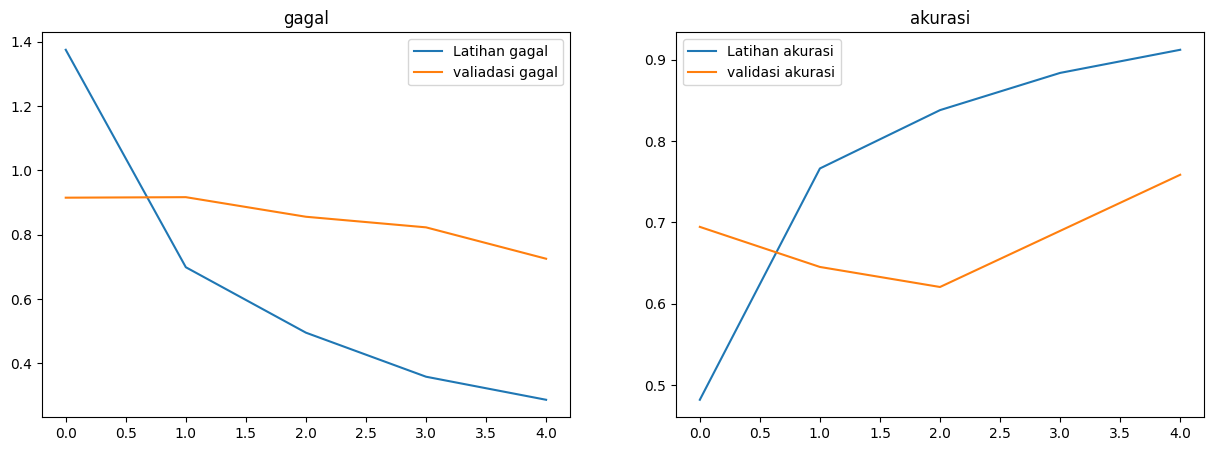

In [13]:
#visualisasi training model yang dilakukan untuk melihat apakah sudah sesuai dengan yang diharapkan
import numpy as np
import matplotlib.pyplot as plt

def tampil_riwayat_latihan(model_fit):
    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    ax[0].set_title('gagal')
    ax[0].plot(model_fit.epoch, model_fit.history["loss"], label="Latihan gagal")
    ax[0].plot(model_fit.epoch, model_fit.history["val_loss"], label="valiadasi gagal")
    ax[1].set_title('akurasi')
    ax[1].plot(model_fit.epoch, model_fit.history["accuracy"], label="Latihan akurasi")
    ax[1].plot(model_fit.epoch, model_fit.history["val_accuracy"], label="validasi akurasi")
    ax[0].legend()
    ax[1].legend()

tampil_riwayat_latihan(model_fit)

In [14]:
#prediksi musik dengan menggunakan model yang sudah dibuat

audio = "/content/ArabicClips/Muwa/Clip_m_10_4.wav"
fitur = ekstraksi_fitur_musik(audio)

x = np.expand_dims(fitur, axis=0)

prediksi1 = model.predict(x)
prediksi_genre = np.argmax(prediksi1[0])
# print(prediksi_genre)
# ----------------------------------------------hasil prediksi dari model yang sudah dibuat
if(prediksi_genre == 0):
  print("prediksi genre masik ini adalah Muwa")
elif (prediksi_genre == 1):
  print("prediksi genre musik ini adalah east")
elif (prediksi_genre == 2):
  print("prediksi genre musik ini adalah loyal")
elif (prediksi_genre == 3):
  print("prediksi genre musik ini adalah poems")
elif (prediksi_genre == 4):
  print("prediksi genre musik ini adalah rai")
ipd.Audio(audio)


1/1 [==============================] - 0s 251ms/step
prediksi genre masik ini adalah Muwa


In [ ]:
Padmavati Darma Putri Tanuwijaya
213400003
Tugas 2

Google Colab : https://colab.research.google.com/drive/1nX6u1-aMcL8WRzWt0rhgFQKb-r8JIE6g?usp=sharing
Dataset yang digunakan :
https://www.kaggle.com/datasets/araraltawil/audio-classifier

Pada code lama terjadi error :

ModuleNotFoundError                       Traceback (most recent call last)
<ipython-input-6-aa436baa7524> in <cell line: 10>()
      8 from keras.models import Sequential
      9 from keras.layers import Dense, Activation
---> 10 from keras.utils.np_utils import to_categorical
     11 import IPython.display as ipd

ModuleNotFoundError: No module named 'keras.utils.np_utils'
---------------------------------------------------------------------------
NOTE: If your import is failing due to a missing package, you can
manually install dependencies using either !pip or !apt.

To view examples of installing some common dependencies, click the
"Open Examples" button below.

Ini terjadi karena module keras.util.np sudah dihapus, code menjadi  :

#impor pustaka yang diperlukan
import librosa
import librosa.feature
import librosa.display
import glob
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Activation
Jadi --->  from keras.utils import to_categorical
import IPython.display as ipd

-------------------------------------------------------------------------
Pada code lama terjadi error :


ValueError                                Traceback (most recent call last)
<ipython-input-10-a3bb4283794c> in <cell line: 2>()
      1 #menampilkan pemutar sampel suara
----> 2 ipd.Audio('/content/266093__stereo-surgeon__kick-loop-5.wav')


/usr/local/lib/python3.10/dist-packages/IPython/lib/display.py in __init__(self, data, filename, url, embed, rate, autoplay, normalize, element_id)
    114         if self.data is not None and not isinstance(self.data, bytes):
    115             if rate is None:
--> 116                 raise ValueError("rate must be specified when data is a numpy array or list of audio samples.")
    117             self.data = Audio._make_wav(data, rate, normalize)
    118


ValueError: rate must be specified when data is a numpy array or list of audio samples.


Permasalahan terjadi karena lokasi file penyimpanan yang berbeda

----------------------------------------------------------------------------------------------------------------------------------

Pada code lama terjadi error :

TypeError                                 Traceback (most recent call last)
<ipython-input-32-40992b01e65e> in <cell line: 2>()
      1 #visualisasi dari frekuensi suara
----> 2 tampilan_mfcc('266093__stereo-surgeon__kick-loop-5.wav')

<ipython-input-30-b5520a9a1c6a> in tampilan_mfcc(song)
      3 def tampilan_mfcc(song):
      4   y, _ = librosa.load(song)
----> 5   mfcc = librosa.feature.mfcc(y)
      6
      7   plt.figure(figsize=(10,4))

TypeError: mfcc() takes 0 positional arguments but 1 was given

Hal ini terjadi karena fungsi librosa.feature.mfcc tidak berhasil menampilkan inputan argumen array audio y namun menampilkan argumen song yang isinya jalannya file audio, jadi membuat file audio dan menampilkan ke fungsi tampilan_mfcc

#membuat fungsi untuk menampilkan isi dari
#MFCC (Mel-frequency cepstral coefficients)
def tampilan_mfcc(y):
    mfcc = librosa.feature.mfcc(y=y, sr=sr)  # Memberikan argumen y dan sr
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mfcc, x_axis='time', y_axis='mel')
    plt.colorbar()
    plt.title('MFCC')
    plt.tight_layout()
    plt.show()


#visualisasi dari frekuensi suara
y, sr = librosa.load('266093__stereo-surgeon__kick-loop-5.wav')  # Memuat file audio
tampilan_mfcc(y)

----------------------------------------------------------------------------------------------------------------------------------
Pada code lama terjadi error :

TypeError                                 Traceback (most recent call last)
<ipython-input-50-809b959d283a> in <cell line: 1>()
----> 1 fitur, label = fitur_dan_label()
1 frames
<ipython-input-46-66b8ceef88d1> in ekstraksi_fitur_musik(f)
      3
      4   #get Mel-frequency cepstral coefficients mendapatkan
----> 5   mfcc = librosa.feature.mfcc(y)
      6   #normalisasi nilai antara -1,1 atau 0,1
      7   mfcc /= np.amax(np.absolute(mfcc))


TypeError: mfcc() takes 0 positional arguments but 1 was given


Penyelesaian : pada code “ mfcc = librosa.feature.mfcc(y)” diubah menjadi ----> 5   mfcc = librosa.feature.mfcc(y=y, sr=sr)


Penggunaan Dataset baru :
Perubahan setelah mengubah dataset ada di code def ekstraksi_fitur_musik(f):
karena di dataset terbaru memiliki panjang audio yang berbeda beda, jadi ditambahkan code pembetulan panjang (jumlah frame) agar konsisten untuk semua file audio yang di proses sehingga array mfcc yang dihasilkan memiliki bentuk yang sama.


Code menjadi :


# Mengatur panjang maksimum
max_length = 25000


def ekstraksi_fitur_musik(f):
    y, sr = librosa.load(f)
    mfcc = librosa.feature.mfcc(y=y, sr=sr)

    # Memotong atau menambahkan nol untuk mengatur panjang
    if mfcc.shape[1] < max_length:
        pad_width = max_length - mfcc.shape[1]
        mfcc = np.pad(mfcc, pad_width=((0, 0), (0, pad_width)), mode='constant')
    elif mfcc.shape[1] > max_length:
        mfcc = mfcc[:, :max_length]


    # Normalisasi nilai antara -1, 1 atau 0, 1
    mfcc /= np.amax(np.absolute(mfcc))


    return np.ndarray.flatten(mfcc)











